In [1]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def creat_dataframe(path, name):
    my_dict = {'MAE loss for test (by epoch)':[],
               'MSE loss for test (by epoch)':[],
               'RMSE loss for test (by epoch)':[],
               'MAE loss for train (by epoch)':['0'],
               'MSE loss for train (by epoch)':['0'],
               'RMSE loss for train (by epoch)':['0']}
    for event in tf.compat.v1.train.summary_iterator(path):
        for v in event.summary.value:
            my_dict[f'{v.tag}'].append(v.simple_value)
    name = pd.DataFrame(my_dict).drop(0)
    return name

Загружаем все необходимые данные

Модели с картами глубины

In [3]:
depth_resnet50 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\depth_resnet50\\events.out.tfevents.1654177306.LAPTOP-04J67C5R.5020.0"
depth_resnet50 = creat_dataframe(path, depth_resnet50)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [4]:
depth_resnet152 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\depth_resnet152\\events.out.tfevents.1654123690.LAPTOP-04J67C5R.1040.0"
depth_resnet152 = creat_dataframe(path, depth_resnet152)

In [5]:
depth_densenet121 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\depth_densenet121\\events.out.tfevents.1654181303.LAPTOP-04J67C5R.9132.0"
depth_densenet121 = creat_dataframe(path, depth_densenet121)

In [6]:
depth_densenet201 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\depth_densenet201\\events.out.tfevents.1654188807.LAPTOP-04J67C5R.4768.0"
depth_densenet201 = creat_dataframe(path, depth_densenet201)

Модели без карт глубины

In [7]:
rgb_resnet50 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\rgb_resnet50\\events.out.tfevents.1654207441.LAPTOP-04J67C5R.15312.0"
rgb_resnet50 = creat_dataframe(path, rgb_resnet50)

In [8]:
rgb_resnet152 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\rgb_resnet152\\events.out.tfevents.1654146183.LAPTOP-04J67C5R.9972.0"
rgb_resnet152 = creat_dataframe(path, rgb_resnet152)

In [9]:
rgb_densenet121 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\rgb_densenet121\\events.out.tfevents.1654218786.LAPTOP-04J67C5R.8948.0"
rgb_densenet121 = creat_dataframe(path, rgb_densenet121)

In [10]:
rgb_densenet201 = pd.DataFrame()
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\final_models\\rgb_densenet201\\events.out.tfevents.1654260507.LAPTOP-04J67C5R.16284.0"
rgb_densenet201 = creat_dataframe(path, rgb_densenet201)

Визуализация


In [11]:
def show_errors(error, type_data):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(1, 2, figsize=(17, 6))
    font_props_title = {'size': 17}
    font_props_labels = {'size': 14}
    
    if type_data == 'depth':
        #test
        sns.lineplot(x=np.linspace(1, 18, 18),
                     y=depth_resnet50[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "lightgreen", marker = "o", markersize = 5, markerfacecolor='green',
                     ax=ax[0],
                    label="ResNet50")
        sns.lineplot(x=np.linspace(1, 20, 20),
                     y=depth_resnet152[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "lightblue", marker = "o", markersize = 5, markerfacecolor='blue',
                     ax=ax[0],
                    label="ResNet152")
        sns.lineplot(x=np.linspace(1, 20, 20),
                     y=depth_densenet121[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "orange", marker = "o", markersize = 5, markerfacecolor='maroon',
                     ax=ax[0],
                    label="DenseNet121")
        sns.lineplot(x=np.linspace(1, 20, 20),
                     y=depth_densenet201[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "hotpink", marker = "o", markersize = 5, markerfacecolor='red',
                     ax=ax[0],
                    label="DenseNet201")

        #train
        sns.lineplot(x=np.linspace(1, 18, 18),
                     y=depth_resnet50[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "lightgreen", marker = "o", markersize = 5, markerfacecolor='green',
                     ax=ax[1],
                     label="Resnet50")
        sns.lineplot(x=np.linspace(1, 20, 20),
                     y=depth_resnet152[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "lightblue", marker = "o", markersize = 5, markerfacecolor='blue',
                     ax=ax[1],
                     label="Resnet152")
        sns.lineplot(x=np.linspace(1, 20, 20),
                     y=depth_densenet121[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "orange", marker = "o", markersize = 5, markerfacecolor='maroon',
                     ax=ax[1],
                    label="DenseNet121")
        sns.lineplot(x=np.linspace(1, 20, 20),
                     y=depth_densenet201[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "hotpink", marker = "o", markersize = 5, markerfacecolor='red',
                     ax=ax[1],
                    label="DenseNet201")
        
        ax[0].set(xticks=np.arange(1, 21))
        ax[1].set(xticks=np.arange(1, 21))
        
    elif type_data == 'rgb':
        #test
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_resnet50[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "lightgreen", marker = "o", markersize = 5, markerfacecolor='green',
                     ax=ax[0],
                    label="ResNet50")
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_resnet152[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "lightblue", marker = "o", markersize = 5, markerfacecolor='blue',
                     ax=ax[0],
                    label="ResNet152")
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_densenet121[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "orange", marker = "o", markersize = 5, markerfacecolor='maroon',
                     ax=ax[0],
                    label="DenseNet121")
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_densenet201[f'{error} loss for test (by epoch)'],
                     linewidth = 2, color = "hotpink", marker = "o", markersize = 5, markerfacecolor='red',
                     ax=ax[0],
                    label="DenseNet201")

        #train
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_resnet50[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "lightgreen", marker = "o", markersize = 5, markerfacecolor='green',
                     ax=ax[1],
                     label="Resnet50")
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_resnet152[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "lightblue", marker = "o", markersize = 5, markerfacecolor='blue',
                     ax=ax[1],
                     label="Resnet152")
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_densenet121[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "orange", marker = "o", markersize = 5, markerfacecolor='maroon',
                     ax=ax[1],
                    label="DenseNet121")
        sns.lineplot(x=np.linspace(1, 40, 40),
                     y=rgb_densenet201[f'{error} loss for train (by epoch)'],
                     linewidth = 3, color = "hotpink", marker = "o", markersize = 5, markerfacecolor='red',
                     ax=ax[1],
                    label="DenseNet201") 


    for a in ax:
        for label in (a.get_xticklabels() + a.get_yticklabels()):
            label.set_font(font_props_labels)

    ax[0].set_title(f'{error} test')
    ax[0].set_xlabel('epoch',fontsize=16)
    ax[0].set_ylabel('error value',fontsize=16)
    ax[0].title.set_font(font_props_title)

    ax[1].set_title(f'{error} train')
    ax[1].set_xlabel('epoch',fontsize=16)
    ax[1].set_ylabel('error value',fontsize=16)
    ax[1].title.set_font(font_props_title)
    plt.setp(ax[0].get_legend().get_texts(), fontsize='15') 
    plt.setp(ax[1].get_legend().get_texts(), fontsize='15')
    if type_data == 'depth':
        fig.suptitle(f'{error}, models with depth maps', fontsize=17, weight='bold')
    else:
        fig.suptitle(f'{error}, models without depth maps', fontsize=17, weight='bold')
    plt.show()


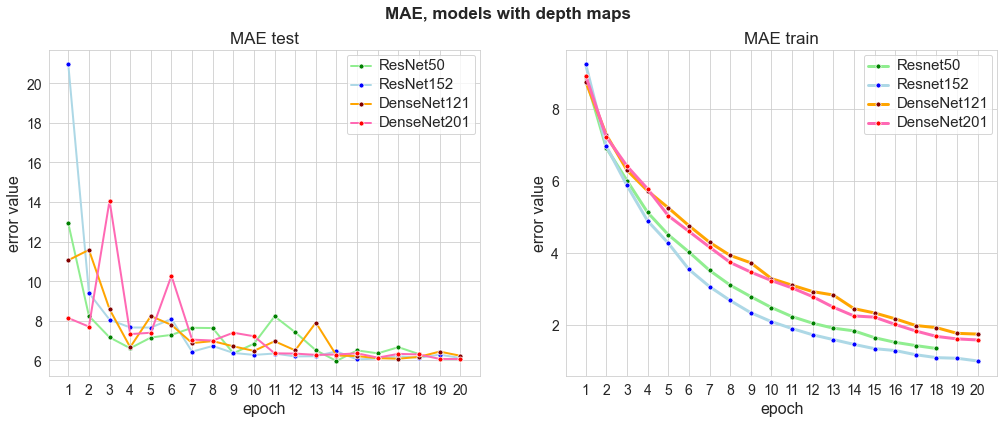

In [12]:
show_errors(error='MAE', type_data='depth')

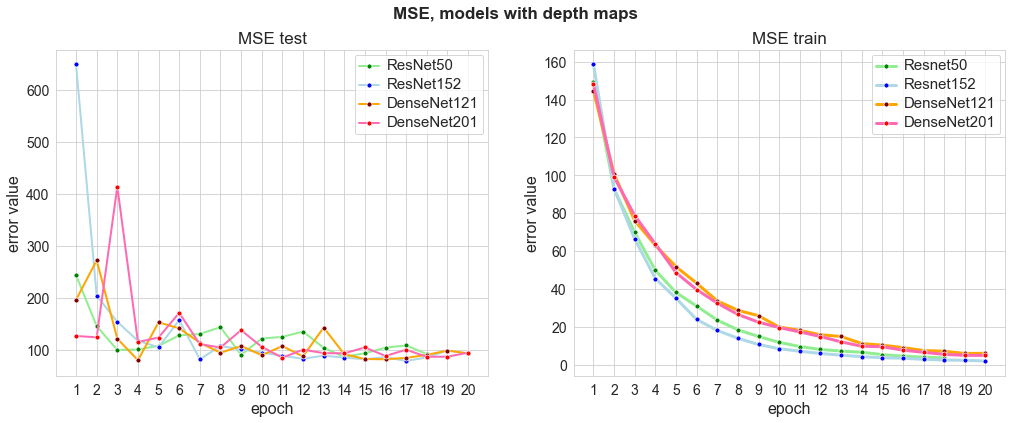

In [13]:
show_errors(error='MSE', type_data='depth')

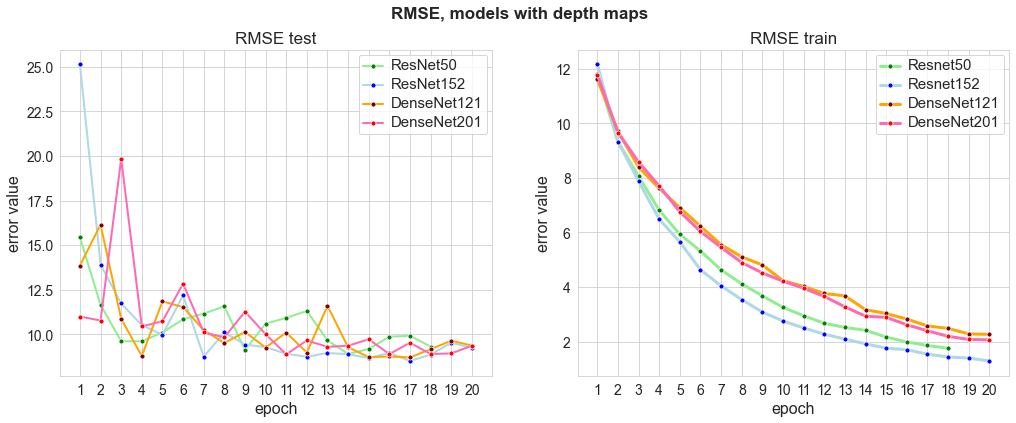

In [14]:
show_errors(error='RMSE', type_data='depth')

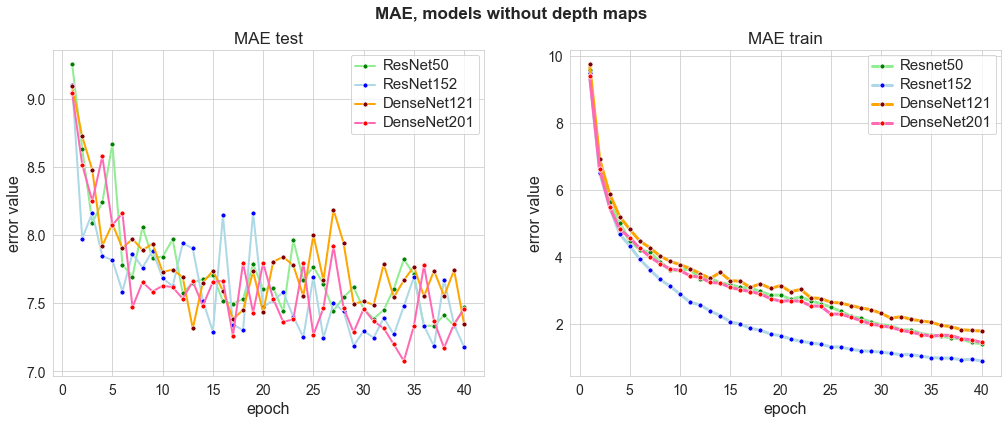

In [15]:
show_errors(error='MAE', type_data='rgb')

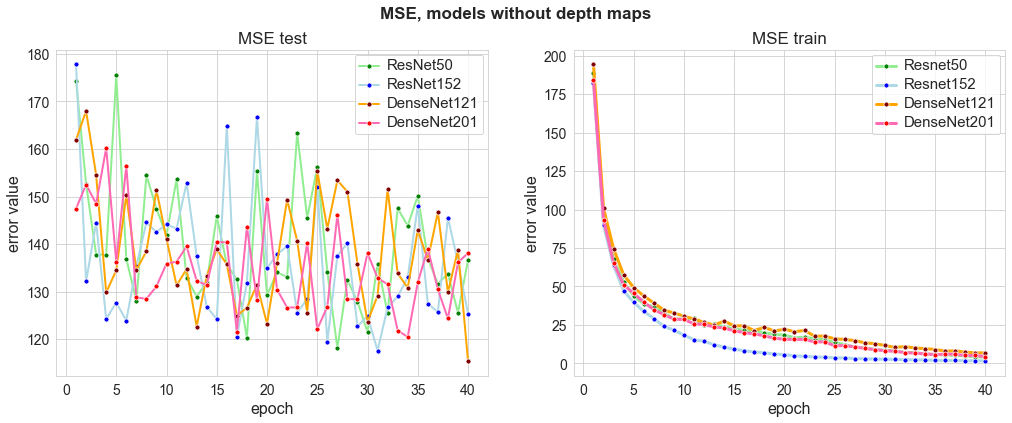

In [16]:
show_errors(error='MSE', type_data='rgb')

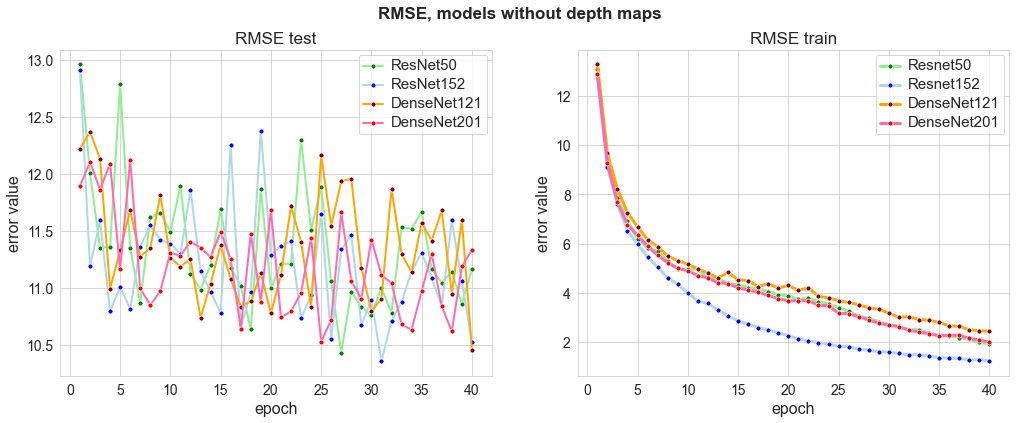

In [17]:
show_errors(error='RMSE', type_data='rgb')

In [30]:
def compare(error):
    sns.set_style("whitegrid")
    font_props_title = {'size': 17}
    font_props_labels = {'size': 14}
    fig, ax = plt.subplots(1, 2, figsize=(17, 6))
    sns.lineplot(x=np.linspace(1, 20, 20),
                 y=depth_resnet152[f'{error} loss for test (by epoch)'],
                 ax=ax[0],
                 linewidth = 2, color = "lightblue", marker = "o", markersize = 5, markerfacecolor='blue',

                label="ResNet152 with depth")
    sns.lineplot(x=np.linspace(1, 40, 40),
                 y=rgb_resnet152[f'{error} loss for test (by epoch)'],
                 ax=ax[0],
                 linewidth = 2, color = "lightgreen", marker = "o", markersize = 5, markerfacecolor='green',

                label="ResNet152 without depth")
    sns.lineplot(x=np.linspace(1, 20, 20),
                 y=depth_resnet152[f'{error} loss for train (by epoch)'],
                 ax=ax[1],
                 linewidth = 2, color = "lightblue", marker = "o", markersize = 5, markerfacecolor='blue',

                label="ResNet152 with depth")
    sns.lineplot(x=np.linspace(1, 40, 40),
                 y=rgb_resnet152[f'{error} loss for train (by epoch)'],
                 ax=ax[1],
                 linewidth = 2, color = "lightgreen", marker = "o", markersize = 5, markerfacecolor='green',

                label="ResNet152 without depth")
    for a in ax:
            for label in (a.get_xticklabels() + a.get_yticklabels()):
                label.set_font(font_props_labels)
    ax[0].set_title(f'{error} test')
    ax[0].set_xlabel('epoch',fontsize=16)
    ax[0].set_ylabel('error value',fontsize=16)
    ax[0].title.set_font(font_props_title)

    ax[1].set_title(f'{error} train')
    ax[1].set_xlabel('epoch',fontsize=16)
    ax[1].set_ylabel('error value',fontsize=16)
    ax[1].title.set_font(font_props_title)
    plt.setp(ax[0].get_legend().get_texts(), fontsize='15') 
    plt.setp(ax[1].get_legend().get_texts(), fontsize='15')
    plt.show()

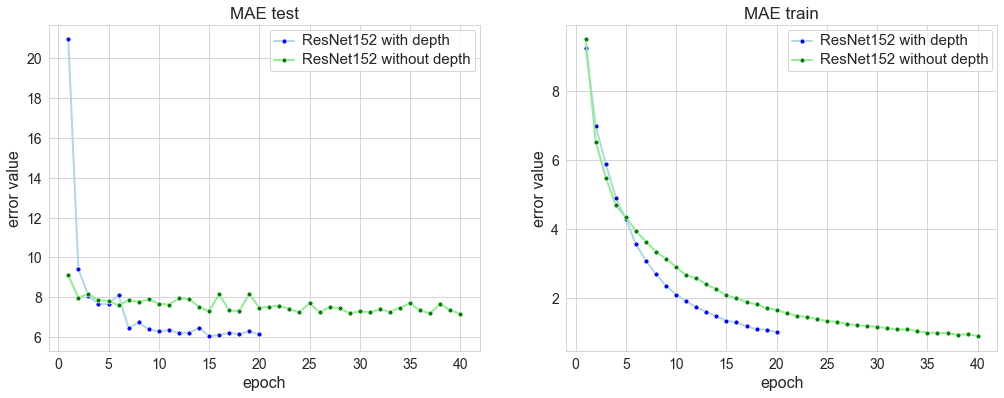

In [31]:
compare('MAE')

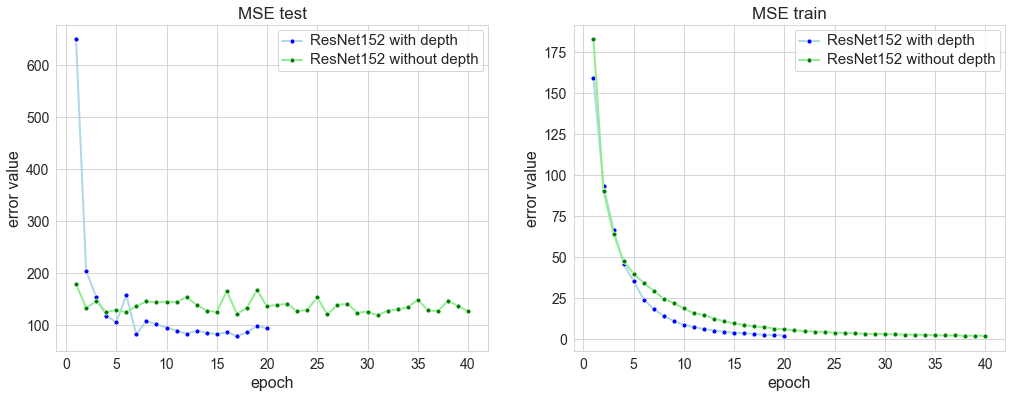

In [32]:
compare('MSE')

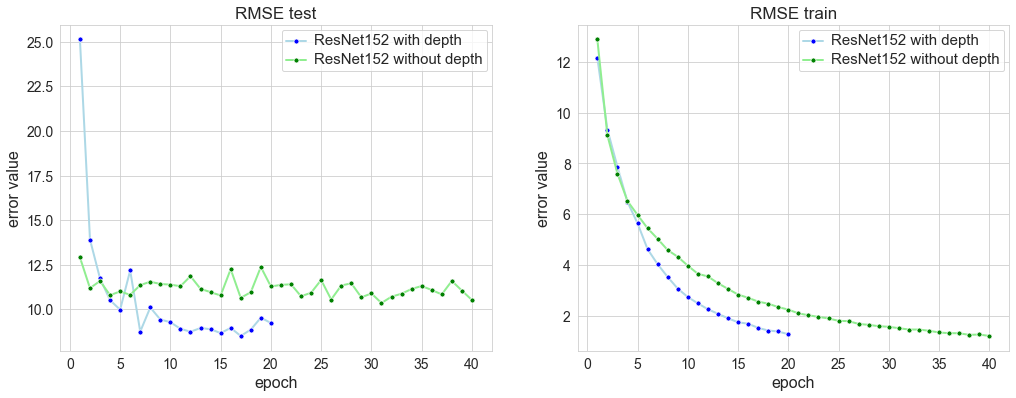

In [33]:
compare('RMSE')